In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import networkx as nx
import numpy as np

def get_ring_of_rings(n_cliques, nodes_per_clique, r_clique, r_graph):
    G = nx.Graph()

    for i in range(n_cliques):
        clique_nodes = list(range(i * nodes_per_clique, (i + 1) * nodes_per_clique))
        G.add_nodes_from(clique_nodes)

        for node1, node2 in zip(clique_nodes, clique_nodes[1:]):
            G.add_edge(node1, node2)
        G.add_edge(clique_nodes[0], clique_nodes[-1])



    clique_edge_offset = nodes_per_clique // 4
    for i in range(n_cliques):
        source_node = nodes_per_clique - clique_edge_offset + i * nodes_per_clique
        target_node = (clique_edge_offset + (i+1) * nodes_per_clique) % (nodes_per_clique * n_cliques)
        G.add_edge(source_node, target_node)

    pos = {}

    angles = np.linspace(-np.pi, np.pi, n_cliques, endpoint=False)

    for i in range(n_cliques):
        cx, cy = r_graph * np.cos(angles[i]), r_graph * np.sin(angles[i])
        small_angles = np.linspace(-np.pi, np.pi, nodes_per_clique, endpoint=False)
        for j in range(nodes_per_clique):
            x = cx + r_clique * np.cos(angles[i] + small_angles[j])
            y = cy + r_clique * np.sin(angles[i] + small_angles[j])
            pos[nodes_per_clique*i + j] = (x, y)

    return G, pos


In [3]:
G, pos= get_ring_of_rings(n_cliques=6, nodes_per_clique=5, r_clique=3, r_graph=10)

In [4]:
import anonymigraph.anonymization as anon

depth = 2
G_nest = anon.nest_model(G, depth=depth, r=10)
anon.method_nest_model._validate_nest(G, G_nest, depth)

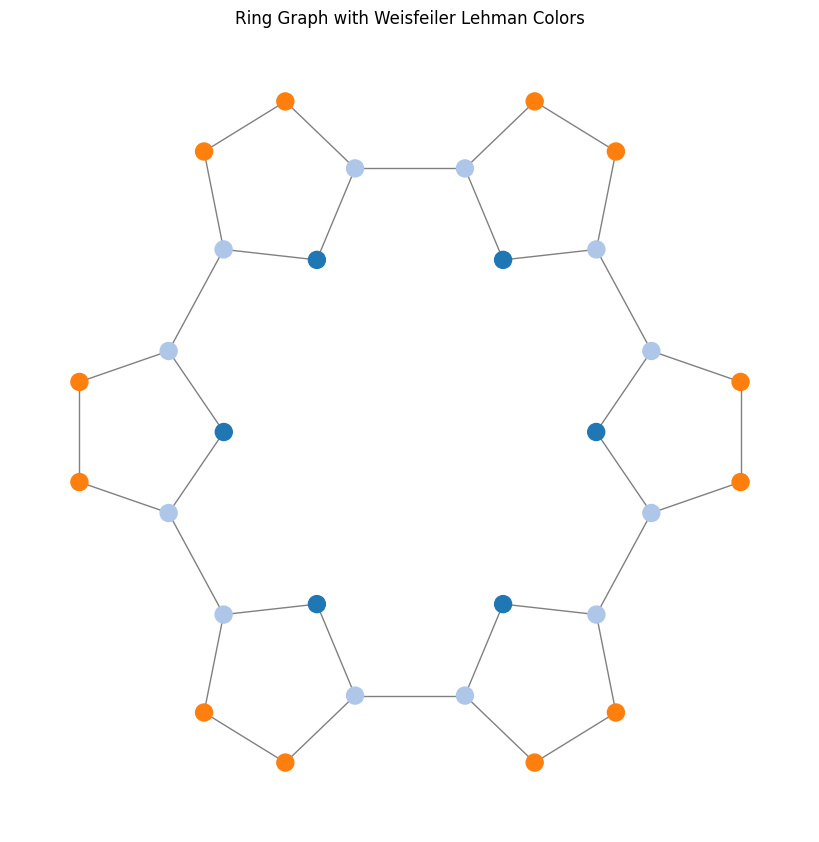

In [5]:
import matplotlib
from anonymigraph.anonymization._external.nest_model.fast_wl import WL_fast

edges = np.array(G.edges, dtype=np.uint32)
bidirectional_edges = np.row_stack((edges, edges[:, [1, 0]]))
colors = WL_fast(bidirectional_edges, G.number_of_nodes(), labels=None, max_iter=None)[-1]
color_map = matplotlib.colormaps.get_cmap('tab20')
assert len(np.unique(colors)) < 20, "Colormap tab20 only supports 20 distinct colors, please use another colormap if you have more wl colors!"
node_colors = [color_map(cls%19) for cls in colors]

# Draw the graph
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
nx.draw(G, pos, with_labels=False, node_color=node_colors, node_size=150, edge_color='gray')
plt.title("Ring Graph with Weisfeiler Lehman Colors")
plt.show()

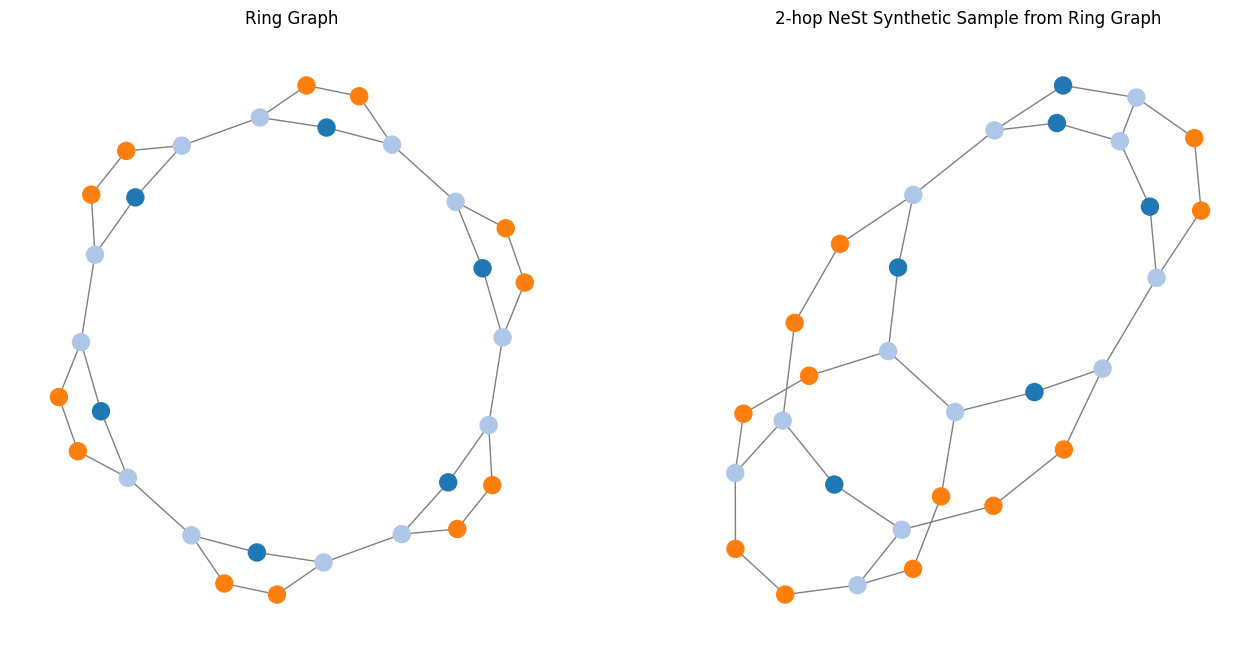

In [6]:
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
nx.draw(G, nx.spring_layout(G, iterations=2000), with_labels=False, node_color=node_colors, node_size=150, edge_color='gray')
plt.title("Ring Graph")

plt.subplot(1, 2, 2)
nx.draw(G_nest, nx.spring_layout(G_nest, iterations=2000), with_labels=False, node_color=node_colors, node_size=150, edge_color='gray')
plt.title(f"{depth}-hop NeSt Synthetic Sample from Ring Graph")

plt.show()

Attempts on bigger graphs

In [7]:
G = nx.erdos_renyi_graph(10000, 30/10000)

In [ ]:
depth = 2
G_nest = anon.nest_model(G, depth=depth, r=80)

In [ ]:
anon.method_nest_model._validate_nest(G, G_nest, depth)